# Stage6

# Intro

숱한 관문을 거치고 어느덧 Stage6까지 오신 여러분 축하드립니다. 👏🏻👏🏻👏🏻  

그간의 Stage들을 통해 데이터 분석과 조금 친해지셨나요?  

이번 Stage에서는 여태까지 해온 데이터 분석 과정을 간단하게 복습하고 더 나아가 고급 분석기법을 사용하여 모델을 고도화 시켜보도록 하겠습니다!!  

마지막 Stage인 만큼 이전에 나왔던 개념들이 다시 나오기 때문에 이전 Stage를 꼼꼼히 보고 오시면 좋겠죠?   

그럼 시작해봅시다! 🧑🏻‍💻

<p style='text-align: right;'> Start</p>

--- 

<img src='https://drive.google.com/uc?export=download&id=1U0zB9lcVjEE6VaJlfn2_mTDj-oKVhzgj' width="" height ="" /><br>

이번 시간에 다루어 볼 내용은 데이터 분석 과정 중에서도 **모델링(앙상블) / 설명** 과정에 속합니다.  

Stage 4에서는 모델링을 통해 점수를 올렸고, Stage 5 에서는 Feature를 바꾸어 가면 성능을 향상시켰었죠?  

이전시간 까지는 단일 모델을 통해서만 성능을 향상시켰다면 이번 시간에는 이러한 <font color="coral">**모델들을 서로 합쳐가며 성능을 향상**</font>시키는 방법에 대해 설명해 보겠습니다. 백짓장도 맞들면 낫다! 라는 옛날 말처럼 과연 모델들을 합치면 성능이 많이 상승할지!! 굉장히 궁금해 지는군요🤗 ㅎㅎ  

또한 데이터 분석에서는 모델의 성능을 향상시키는 것 뿐 아니라 <font color="coral">**모델을 설명**</font>하는 것도 상당히 중요합니다.

그렇다면 어떻게 우리가 만든 모델을 설명할 수 있을지도 한 번 배워봅시다.

---

# 1. 이전 Stage 복습 및 본인 데이터 불러오기

>먼저 본인이 만든 Feature를 불러오고 Stage4에서 배운 Random Search를 이용해 Hyperparameter들을 Tuning한 후 저장해보겠습니다.  
>
>실습으로 RandomForest까지 밖에 안해봤지만 다른 모델들도 적용시켜봅시다.  
>
>코드가 어려울 수 있으나 간단한 for문과 dictionary형태로 이루어진 것 뿐이니 겁먹지 말고 필사하며 이해해봅시다.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 

 
# 이전 시간 까지 만들어 놓은 feature들 불러오기
train = pd.read_csv('./전처리 파일 및 데이터/train_stage6.csv').copy()
test = pd.read_csv('./전처리 파일 및 데이터/test_stage6.csv').copy()
submission = pd.read_csv('./sample_submission.csv').copy()

target = train.credit
train.drop(['index','credit'], axis = 1, inplace = True)
test.drop('index', axis = 1, inplace = True)

In [2]:
# train, val 데이터 분할 

X_train, X_valid, y_train, y_valid = train_test_split(train, target, test_size=0.3)

In [3]:
# 모델 불러오기 

from sklearn.neighbors import KNeighborsClassifier
# Tree 기반 모델
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

#  Boosting models
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# random state를 위한 seed 지정 
seed = 77

In [4]:
# 사용하고자 하는 모델과 tuning하기 위한 hyperparameter의 범위를 지정하시오
# 현재 KNN, RandomForest, Extra Tree, GBM, LGBM, XGB에 대한 하이퍼 파라미터가 담겨있음  
### 성능을 위해 DT는 사용하지 않습니다.

clfs = [
    (
        KNeighborsClassifier(),              # 사용하려는 모델
        {'n_neighbors': [3,5,7,9,11],        # 최적화하려는 하이퍼파라미터 dictionary형태로 삽입
         'weights': ['uniform','distance']}
    ),
    
    (
        RandomForestClassifier(random_state=seed),
        {'n_estimators': [100,200,300],
         'max_depth': [None,3,4,5],
         'max_features': (0.8, 0.9 ,1.0),
         'min_samples_split': (2, 3, 4, 5),                                     
         'min_samples_leaf': (1, 2, 3, 4, 5)}
    ),
    
    (
       ExtraTreesClassifier(random_state=seed),
        {'n_estimators': (100, 200, 300, 400 ,500),
            'max_depth': (10, 20, 30, 50),    
            'max_features': (0.8, 0.9 ,1.0),
            'min_samples_split': (2, 3, 4, 5),                                     
            'min_samples_leaf': (1, 2, 3, 4, 5)}
    ),
    
    (
        GradientBoostingClassifier(random_state=seed),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],
         'max_depth': (7, 15),
         'subsample': (0, 0.3, 0.5, 0.7, 1)}
    ),
    
     (
        XGBClassifier(random_state=seed, n_jobs=-1),
        {'learning_rate': (1,  0.1, 0.01, 0.001),
            'n_estimators': (100, 200, 300, 500),
            'max_depth': (7, 15),   
            'subsample': (0, 0.3, 0.5, 0.7, 1)}
        
    ),
    
     ( 
        LGBMClassifier(random_state=seed, n_jobs=-1),
     {'num_leaves': (16, 64, 128, 256, 512),       
        'learning_rate': (1,  0.1, 0.01, 0.001), 
        'n_estimators': (100, 200, 300, 500),      
        'subsample': (0, 0.3, 0.5, 0.7, 1)}
    )
]

In [5]:
# 모델 시간측정을 위해 tqdm과 time을 import
from tqdm import tqdm
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss, make_scorer

# 튜닝된 모델을 저장
clfs_tuned = []  

# logloss socore 만들기
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# 위에서 저장한 clfs를 모델 개수만큼 반복
for clf, param_grid in tqdm(clfs):
    start = time.time()                                     ## 걸리는 시간을 알기 위해 time 호출

    rand_search = RandomizedSearchCV(clf,                  ## 모델
                                     param_grid,           ## 위에서 지정한 hyper parameter들
                                     n_iter = 5,           ## 몇번 반복할건지
                                     scoring=LogLoss,      ## score를 logloss로 지정
                                     cv = 3,               ## cv 횟수 
                                     random_state = seed,
                                     n_jobs=-1)
    
    rand_search.fit(X_train, y_train)                ## randomsearch 모델에 fit
    
    clf_name = type(clf).__name__                   ## 각 모델의 이름
    clf_score = (-1 * rand_search.score(X_valid, y_valid))   ## 각 모델의 스코어
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))   ## 걸리는 시간
    clfs_tuned.append((clf_name, rand_search, clf_score))    ## 튜닝된 모델 저장

 17%|██████████████                                                                      | 1/6 [00:27<02:16, 27.24s/it]

KNeighborsClassifier                                 2.607508 27.2


 33%|████████████████████████████                                                        | 2/6 [00:45<01:27, 21.89s/it]

RandomForestClassifier                               0.863147 18.1


 50%|██████████████████████████████████████████                                          | 3/6 [01:12<01:12, 24.06s/it]

ExtraTreesClassifier                                 0.843137 26.6


 67%|████████████████████████████████████████████████████████                            | 4/6 [03:09<02:01, 60.90s/it]

GradientBoostingClassifier                           0.850534 117.4


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [04:11<01:01, 61.49s/it]

XGBClassifier                                        0.907531 62.5


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:36<00:00, 46.04s/it]

LGBMClassifier                                       0.798062 24.3


In [7]:
## 각 모델의 하이퍼 파라미터가 저장되어 있는걸 볼 수 있다.
clfs_tuned

[('KNeighborsClassifier',
  RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                     param_distributions={'n_neighbors': [3, 5, 7, 9, 11],
                                          'weights': ['uniform', 'distance']},
                     random_state=77,
                     scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True)),
  2.6075075193979895),
 ('RandomForestClassifier',
  RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=77),
                     n_iter=5, n_jobs=-1,
                     param_distributions={'max_depth': [None, 3, 4, 5],
                                          'max_features': (0.8, 0.9, 1.0),
                                          'min_samples_leaf': (1, 2, 3, 4, 5),
                                          'min_samples_split': (2, 3, 4, 5),
                                          'n_estimators': [100, 200, 300]},
                     random_state=77,
                

##  Inst.

- 이전 Stage까지의 본인 Feature를 불러오세요. 
- 예제 코드에 있는 model을 참고하여 데이터를 모델에 학습시키고 Hyper Parameter Tuning 후 정보를 저장하세요.

##  Hint.

예제 코드를 필사하며 이해해보세요!
clfs_tuned에 본인이 설정한 모델들이 들어가 있어야 합니다.

## Solution.

Empty

---

# 2. 앙상블(Ensemble)

#### 앙상블이란?
앙상블이란 전체적인 어울림이나 통일을 의미하는 프랑스어입니다. 

주로 연주회에서 많이 쓰이는 단어 인데요,  해당 어원을 가져와 머신러닝에서는 하나가 아닌 여러 모델을 사용하여 예측력을 향상시키는 것을 의미합니다.  

 <img src='https://drive.google.com/uc?export=download&id=1Qs2GZ6zZGVCzoZ0KfDQ9tGcQKDTWlavz' width="" height ="" /><br>

보시는 것 처럼 앙상블에도 다양한 종류가 존재합니다.  


사실 여러분들이 앞서 배웠던 모델 중에서 Bagging이나 Boosting에 해당하는 모델이 있었습니다. 

과연 어떤 모델이 이러한 방식에 해당할지 밑에서 확인해 봅시다!

## 2.1 같은 모델 앙상블

### 2.1.1 배깅(Bagging)

<img src='https://drive.google.com/uc?export=download&id=15Vc2NKY0XiTqSezgkRGWKCnHoZ5IA7jy' width="" height ="" /><br>


`Bagging`이란 Bootstrap Aggregation의 약자로 <font color="coral">**샘플을 여러 번 뽑아 각 모델을 학습시킨 결과물을 집계**</font>하는 방법입니다.  

Bootstrap 이란 기존의 학습 데이터로 부터 <font color="coral">**랜덤하게 복원추출**</font>을 시행하여 동일한 사이즈를 여러개 만들어 학습 시키는 방법입니다.

여러분이 배우신 랜덤포레스트(RandomForest) 모델이 해당 기법을 사용한 모델인데요,   

여러개의 Decision Tree 모델을 여러개 학습시켜 해당 값의 평균혹은 최빈값을 산출해 최종 결과를 내는 방식입니다.  

회귀 문제일 때는 평균으로 집계가 되고, 분류 문제일 때에는 최빈값을 뽑는 방식으로 결과가 집계됩니다.

### 2.1.2 부스팅(Boosting)

<img src='https://drive.google.com/uc?export=download&id=1pfEib4GXubptg9n0ir7IJ5YnRwtwdb_G' width="" height ="" /><br>

<p style='text-align: right;'> 출처: Medium (Boosting and Bagging explained with examples)</p>

`Boosting`을 한마디로 설명하자면 <font color="coral">**약한 분류기(Model)를 점점 진화시켜 강한 분류기로 만들어나가는 것**</font>입니다.

가장 처음 모델이 예측을 수행하면 당연히 좋은 예측을 하기 힘들고, 오류값이 나올겁니다. 

그러면 해당 오류값에 가중치가 부여되고 다음 모델에서는 해당 가중치를 파악하여 예측을 수행합니다. 

잘못 분류된 데이터를 학습해 나가며 약한 분류기들을 통해 강한 분류기를 만드는 것이지요.

마지막에는 결과값을 집계해 예측하게 됩니다.

### 2.1.3 배깅 VS 부스팅

<img src='https://drive.google.com/uc?export=download&id=19XXWgvHehs9NQiNa1QUYlYKMbNfO_LtJ' width="" height ="" /><br>

<p style='text-align: right;'> 출처: swallow.github.io</p>

이론적으로만 보면 부스팅이 훨씬 좋은 모델같아 보입니다. 학습을 시키면 시킬수록 강한 모델을 만들 수 있으니까요. 

하지만 여기에도 단점은 존재합니다. 머신러닝을 수행하다보면 필연적으로 마주치게 되는 문제가 있는데요, 바로  <font color="coral">**과적합 문제**</font>입니다. 

학습데이터에 모델이 너무 과하게 적합되면(적합은 Fitting 된다고도 표현합니다.) 실제 데이터를 모델에 주었을 때 오히려 모델의 성능이 떨어지게 되는 문제이지요.😰

간단하게 예를 들어볼까요?   

> 양갱이는 수학을 잘 못합니다. 그래서 수학 시험을 볼때면 문제를 외워서 풀곤 하는데, 이번 수학시험에도 족집게 선생님이 집어준 문제만 달달 외워서 시험을 봅니다. 당연히 학원에서는 만점을 받습니다.족집게 선생님이 외우라고 한 문제만 출제했으니까요.  
( = Train 데이터를 기가막히게 맞춥니다.)   
> 하지만 학교에서 시험을 보니 외운 문제가 반밖에 안나와 시험 점수가 떡락합니다. 수학은 수식을 이해하고 응용할 줄 알아야하니까 당연한 결과겠지요?( = 실제 Test 데이터에서는 오히려 성능이 떨어집니다.)  
 
 
 이처럼 Boosting에도 단점이 존재합니다. 그러면 어떠한 모델을 사용해야 할까요? 정답은..... 🧐
 
 그때그때 다릅니다!🤨 성능이 낮아서 문제라면 부스팅을 써야하고, 과적합이 문제인것 같으면 배깅을 사용하면 좋겠죠?

## 2.2 다른 모델 앙상블

### 2.2.1 보팅(Voting)

`Voting` 은 의미 그대로 투표를 통해 결정하는 방식입니다. 서로 다른 모델로 부터 나온 결과를 투표를 통해 최종 결과를 예측합니다.  
배깅과 비슷해 보이지만 **배깅은 같은 모델을 사용하고 보팅은 다른 모델을 사용한다는 점**이 다릅니다.  

Voting에는 크게 `Hard Voting`과 `Soft Voting`이 존재합니다.
> 1. Hard Voting  
> 예측한 결과값 중 다수의 분류기가 결정한 예측 값을 최종 보팅 결과값에 선정합니다. 

> 2. Soft Voting  
> 모델의 결과값을 평균 하여 사용합니다. 분류 문제일 경우에는 Class에 해당하는 확률을 평균합니다.

이제 코드를 통해 구현해봅시다.
위의 복습 코드를 돌려봤다는 가정 하에 보시면 됩니다.

In [8]:
# Ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# 랜덤 스테이트를 고정하여 모델이 항상 같은 값을 내도록 설정
seed = 77

In [9]:
# Voting에 사용할 모델 불러오기
rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()

# models 변수에 voting에 사용할 모델 할당하기
models = [rf_clf, knn_clf]

# model에 해당하는 best param을 clfs_tuned에서 찾아서 할당하기
for clf in clfs_tuned:
    for model in models:
        if clf[0] == model.__class__.__name__:
            model.set_params(**clf[1].best_params_)
        else: 
            continue


# VotingClassifer에 할당할 모델들의 이름과 종류를 for문을 통해 estimators에 할당
estimators = [(model.__class__.__name__, model) for model in models]

print('Voting에 사용할 모델과 하이퍼파라미터: ', estimators)

Voting에 사용할 모델과 하이퍼파라미터:  [('RandomForestClassifier', RandomForestClassifier(max_depth=5, max_features=0.9, min_samples_split=4,
                       n_estimators=200)), ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=9))]


In [10]:
# VotingClassifer에 estimators에 사용 모델들을 파라미터로 주어 voting 실시
voting_clf = VotingClassifier(estimators = estimators, 
                              voting='soft',      # voting 파라미터로 hard/soft 선택    # hard -> 최빈값, soft -> 평균
                              n_jobs=-1)


voting_clf.fit(X_train, y_train)

# 예측값 생성
pred = voting_clf.predict_proba(X_valid)

test_score = log_loss(y_valid, pred)

print('KNN / RF Voting Score: ', test_score)

KNN / RF Voting Score:  0.8488509459037104


### Inst.

- 다양한 모델들을 VotingClassifier의 인자로 주어 VotingClassifier를 학습시켜보세요.
- voting 방식은 soft로 고정하세요
- 모델은 위에 실습해본 모델을 포함하여 더 3개 이상 시도해보세요.

### Hint.

각 모델을 할당할 때, 앞서 구한 Hyperparameter들을 넣어주면 더 좋은 성능을 낼 수 있습니다.   
저장해놓은 파라미터들을 모델에 할당해 봅시다.

### Solution.
(example)

In [11]:
# 모델
rf_clf = RandomForestClassifier()
extra_clf = ExtraTreesClassifier()
gbm_clf = GradientBoostingClassifier()
xgb_clf = XGBClassifier()
lgb_clf = LGBMClassifier()

models = [rf_clf, extra_clf, gbm_clf, xgb_clf, lgb_clf]

for clf in clfs_tuned:
    for model in models:
        if clf[0] == model.__class__.__name__:
            model.set_params(**clf[1].best_params_)
        else: 
            continue

estimators = [(model.__class__.__name__, model) for model in models]

voting_clf = VotingClassifier(estimators = estimators, voting='soft', n_jobs=-1)

voting_clf.fit(X_train, y_train)

pred = voting_clf.predict_proba(X_valid)

test_score = log_loss(y_valid, pred)

print(test_score)

0.8334221030501114


### 2.2.2 스태킹(Stacking)

다음은 `Stacking` 입니다. 해당 방법도 의미를 생각해보면 이해하기가 쉽습니다. '쌓는다'라는 의미로 말 그대로 모델을 쌓는겁니다!!   

스태킹은 **총 2가지 단계**로 이루어져 있는데요, 

**1단계로**는 개별 모델을 통해 예측을 수행합니다. 여기서 예측 모델이 무엇이던 간에 어쨌든 예측값이 나오게 됩니다. 

그러면 **2단계**로 넘어갑니다. 각 모델이 예측한 결과를 한 모델에 다시 넣어 예측을 수행합니다. 

이렇게 마지막 모델을 <font color="coral">**메타 모델**</font>이라고도 하며,  <font color="coral">**모델의 예측값들을 피쳐로 가지고 한번 더 모델을 돌린다**</font>라고 생각하시면 이해가 쉬울겁니다.

아래 그림을 보며 이해해보세요.🤗



<img src='https://drive.google.com/uc?export=download&id=1XWJ7jZ-QTrKBvjnOnCgVdrE0i5PyCjjP' width="" height ="" /><br>

스태킹도 코드를 통해 구현해 봅시다.

하지만 스태킹 코드를 보기 앞서 이해해야할 개념이 있습니다. 

해당 개념은 Stage3 에서도 잠깐 다룬적이 있습니다. Stage3 자료를 보시고 다시 오시면 더 이해하기가 편합니다. 

저희에게는  **train / valid / test** 이렇게 3개의 데이터셋이 존재합니다. 원래 데이터셋을 모델에 적용할 때에는 train_dataset으로 모델을 학습시키고 valid_dataset으로 평가를 진행한 뒤 test_dataset 즉, submission을 위한 데이터를 적용시켰습니다.

그러나 아래에 그림을 봅시다. 

<img src='https://drive.google.com/uc?export=download&id=1U2jkRu2jHMNeV0Ay4NVzEuFRcux0YVoL' width="" height ="" /><br>

이와 같이 기존에는 모델에 대한 평가를 1번 진행했다면 지금은 2단계에 거쳐 2번 진행해야 하기 때문에 데이터셋이 부족한 것을 알 수 있습니다.

Stacking 모델에서는 Train과 Valid dataset 모두 모델을 fitting 하는데 사용되기 때문이죠.

따라서, 우리는 아래 그림처럼 <font color="coral">**기존 데이터셋에서 한번 더 데이터를 분할**</font>해야 함을 알 수 있습니다.

<img src='https://drive.google.com/uc?export=download&id=1vaBi5_KIPpbQvOvgtRlWx1PfdsxtXt8n' width="" height ="" /><br>

물론 데이터 분할 시에 K-fold와 같은 방식을 적용할 수 있습니다.

K-fold를 통해 데이터를 나누게 되면 데이터를 더 많이 사용할 수 있다는 장점이 있지만 본 예시에서는 이해를 위해 먼저 Hold-out 방식을 사용해 데이터셋을 나누어 주겠습니다. 

#### 1단계. Base Model Train

In [12]:
# base 모델 학습과 평가를 위한 새로운 데이터셋 분할
X_BaseTrain, X_BaseValid, y_BaseTrain, y_BaseValid = train_test_split(X_train, y_train, test_size=0.3)

In [13]:
# 베이스 모델 예측값 생성
def get_stacking_base_datasets(model):
    
    # 모델 학습
    model.fit(X_BaseTrain, y_BaseTrain)
    
    # 예측값 생성
    train_base_pred = model.predict(X_BaseValid)    # train 예측값
    valid_base_pred = model.predict(X_valid)      # valid 예측값
    test_base_pred = model.predict(test)     # test 예측값
    
    return train_base_pred, valid_base_pred, test_base_pred    # 메타 모델을 위한 prediction 값 생성

In [14]:
# 객체 생성
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()


# 사용할 모델
base_models = [knn_clf , rf_clf, xgb_clf]

# 결과값을 저장할 리스트 생성
train_preds = []
valid_preds = []
test_preds = []

for base_model in base_models:
   
    base_model_train, base_model_valid, base_model_test  = get_stacking_base_datasets(base_model)
    
    # 결과값 저장
    train_preds.append(base_model_train)
    valid_preds.append(base_model_valid)
    test_preds.append(base_model_test)

    
# 피쳐 형태로 변환하기 위해 array 변환 후 transpose
meta_train = np.transpose(np.array(train_preds))
meta_valid = np.transpose(np.array(valid_preds))
meta_test = np.transpose(np.array(test_preds))

#### 2단계. Meta Model Train

In [15]:
# 메타 모델 설정
meta_model =  RandomForestClassifier()

# 모델 학습
meta_model.fit(meta_train, y_BaseValid)

# 평가를 위한 prediction과 submission(test)를 위한 prediction 생성
stack_valid_pred = meta_model.predict_proba(meta_valid)    # log_loss 계산을 위해 predict_proba
stack_test_pred = meta_model.predict(meta_test)    # submission을 위한 test prediction

In [16]:
# stacking model validation score 산출
valid_score = log_loss(y_valid, stack_valid_pred)

print('Stacking Logloss Score: ', valid_score)

Stacking Logloss Score:  0.8357953304215485


---
### <font color = red>스태킹에 대한 추가 정보</font>

>보시는 것 처럼 스태킹을 사용한다고 해서 항상 스코어가 올라가지는 않습니다. 또한 어떤 모델을 통해 BaseModel을 만들지, MetaModel은 무엇을 사용해야 할지 데이터에 따라 기준이 모호하기 때문에 모델 선정에서 민감한 모습을 보여줍니다.
>
>일반적으로 가장 점수가 잘 나오는 모델들을 BaseModel로 사용하고 MetaModel도 최신 모델을 사용한다면 스코어가 올라갈 것이라고 기대하며 사용하곤 합니다.
>
>이처럼 스태킹은 불안요소가 많고 다양한 모델들이 결합되기 때문에 모델을 만든 이후에 설명력이 떨어집니다. 따라서 캐글이나 데이콘처럼 점수경쟁이 치열한 대회에서 주로 사용된다는 것을 명심하세요!!

---
#### <font color = red>(심화)이후의 정보는 K-fold Stacking에 대한 코드입니다. </font>

위의 Hold-out 방식과 개념은 동일하나 BaseModel Train 시에 K-fold 방식으로 validation을 진행합니다. 코드를 하나하나 뜯어보며 이해해보시면 개념을 이해하고 실력을 향상하는데 도움이 될겁니다.
 
<p style='text-align: right;'>본 코드는 파이썬 머신러닝 완벽 가이드(권철민, 2019) 교재에서 발췌하였습니다.</p>

#### 1단계. Base Model Train

In [17]:
from sklearn.model_selection import KFold

# 메타 모델을 위한 학습 및 테스트 데이터 생성
def get_stacking_base_datasets_kfold(model, X_train_n, y_train_n, X_test_n, n_folds):
    
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
    
    # prediction 값을 받기 위한 빈 배열 생성
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    
    # 기존 X_train에서 validation set을 한번 더 만들어 주는 코드(위에서 학습했죠?)
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('폴드 세트 : ', folder_counter, ' 시작')
        X_tr = np.array(X_train_n)[train_index]
        y_tr = np.array(y_train_n)[train_index]
        X_te = np.array(X_train_n)[valid_index] 
        
        # 폴드 내 모델 학습
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1) # y_train 생성, 이후 많은 모델들의 y값을 concat 하기 위해 reshape
        test_pred[:, folder_counter] = model.predict(X_test_n) # y_test 예측
        
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1) # 폴드가 끝난 후 test prediction값을 평균
    
    return train_fold_pred, test_pred_mean # 하나의 모델에 대한 학습데이터, 테스트 데이터 생성

#### 2단계. Meta Model Train

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# 객체 생성
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
dt_clf = DecisionTreeClassifier()

meta_model = RandomForestClassifier()

# 개별 모델로부터 메타 모델에 필요한 데이터 셋 생성
knn_train, knn_test = get_stacking_base_datasets_kfold(knn_clf, X_train, y_train, test, 7)
rf_train, rf_test = get_stacking_base_datasets_kfold(rf_clf, X_train, y_train, test, 7)
dt_train, dt_test = get_stacking_base_datasets_kfold(dt_clf, X_train, y_train, test, 7)

# 개별 모델로부터 나온 y_train 예측값 병합
Stack_final_X_train = np.concatenate((knn_train,rf_train,dt_train), axis=1)

# 개별 모델로부터 나온 y_test 예측값 병합
Stack_final_X_test = np.concatenate((knn_test,rf_test,dt_test), axis=1)


meta_model.fit(Stack_final_X_train, y_train)         ## 위의 hold-out 예시와는 다르게 y_train값을 통해 fitting 시키는 점에 유의하세요.
stack_final = meta_model.predict(Stack_final_X_test) 

폴드 세트 :  0  시작
폴드 세트 :  1  시작
폴드 세트 :  2  시작
폴드 세트 :  3  시작
폴드 세트 :  4  시작
폴드 세트 :  5  시작
폴드 세트 :  6  시작
폴드 세트 :  0  시작
폴드 세트 :  1  시작
폴드 세트 :  2  시작
폴드 세트 :  3  시작
폴드 세트 :  4  시작
폴드 세트 :  5  시작
폴드 세트 :  6  시작
폴드 세트 :  0  시작
폴드 세트 :  1  시작
폴드 세트 :  2  시작
폴드 세트 :  3  시작
폴드 세트 :  4  시작
폴드 세트 :  5  시작
폴드 세트 :  6  시작


### Inst.
사실 위 같은 코드로만 진행하게 되면 meta_model에 대한 Validation은 진행할 수 없게 됩니다.

그렇다면 어떻게 validation set의 score를 구할 수 있을지 고민해 보시고, 코드를 수정해보세요!

### Hint.

현재 파라미터가 X_test밖에 없죠? 해당 자리가 Validation data가 들어가야 할 자리입니다.

그렇담 Test data를 함수에 할당해 주어야 겠죠?

### Solution.

#### 1단계. Base Model Train

In [19]:
def get_stacking_base_datasets_kfold(model, X_train_n, y_train_n, X_val_n, X_test_n, n_folds):
    
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
    
    # prediction 값을 받기 위한 빈 배열 생성
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    val_pred = np.zeros((X_val_n.shape[0],n_folds))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    
    # 기존 X_train에서 validation set을 한번 더 만들어 주는 코드(위에서 학습했죠?)
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print(f'{type(model).__name__} 폴드 세트 : ', folder_counter, ' 시작')
        X_tr = np.array(X_train_n)[train_index]
        y_tr = np.array(y_train_n)[train_index]
        X_te = np.array(X_train_n)[valid_index] 
        
        # 폴드 내 모델 학습
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1) # y_train 생성, 이후 많은 모델들의 y값을 concat 하기 위해 reshape
        val_pred[:, folder_counter] = model.predict(X_val_n) # y_val 예측
        test_pred[:, folder_counter] = model.predict(X_test_n) # y_test 예측
        
    val_pred_mean = np.mean(val_pred, axis=1).reshape(-1,1) # 폴드가 끝난 후 val prediction값을 평균
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1) # 폴드가 끝난 후 test prediction값을 평균
    
    return train_fold_pred, val_pred_mean, test_pred_mean # 하나의 모델에 대한 학습데이터, 평가 데이터, 테스트데이터 생성


#### 2단계. Meta Model Train

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# 객체 생성
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
dt_clf = DecisionTreeClassifier()

meta_model = RandomForestClassifier()

# 개별 모델로부터 메타 모델에 필요한 데이터 셋 생성
knn_train, knn_val, knn_test = get_stacking_base_datasets_kfold(knn_clf, X_train, y_train, X_valid, test, 7)
rf_train, rf_val, rf_test = get_stacking_base_datasets_kfold(rf_clf, X_train, y_train, X_valid, test, 7)
dt_train, dt_val, dt_test = get_stacking_base_datasets_kfold(dt_clf, X_train, y_train, X_valid, test, 7)

# 개별 모델로부터 나온 y_train 예측값 병합
Stack_final_X_train = np.concatenate((knn_train,rf_train,dt_train), axis=1)

# 개별 모델로부터 나온 y_val 예측값 병합
Stack_final_X_val = np.concatenate((knn_val,rf_val,dt_val), axis=1)

# 개별 모델로부터 나온 y_test 예측값 병합
Stack_final_X_test = np.concatenate((knn_test,rf_test,dt_test), axis=1)


meta_model.fit(Stack_final_X_train, y_train)
stack_valid_pred = meta_model.predict_proba(Stack_final_X_val) 

# stacking model validation score 산출
valid_score = log_loss(y_valid, stack_valid_pred)
print('Stacking Logloss Score: ', valid_score)


KNeighborsClassifier 폴드 세트 :  0  시작
KNeighborsClassifier 폴드 세트 :  1  시작
KNeighborsClassifier 폴드 세트 :  2  시작
KNeighborsClassifier 폴드 세트 :  3  시작
KNeighborsClassifier 폴드 세트 :  4  시작
KNeighborsClassifier 폴드 세트 :  5  시작
KNeighborsClassifier 폴드 세트 :  6  시작
RandomForestClassifier 폴드 세트 :  0  시작
RandomForestClassifier 폴드 세트 :  1  시작
RandomForestClassifier 폴드 세트 :  2  시작
RandomForestClassifier 폴드 세트 :  3  시작
RandomForestClassifier 폴드 세트 :  4  시작
RandomForestClassifier 폴드 세트 :  5  시작
RandomForestClassifier 폴드 세트 :  6  시작
DecisionTreeClassifier 폴드 세트 :  0  시작
DecisionTreeClassifier 폴드 세트 :  1  시작
DecisionTreeClassifier 폴드 세트 :  2  시작
DecisionTreeClassifier 폴드 세트 :  3  시작
DecisionTreeClassifier 폴드 세트 :  4  시작
DecisionTreeClassifier 폴드 세트 :  5  시작
DecisionTreeClassifier 폴드 세트 :  6  시작
Stacking Logloss Score:  0.8183539458107202


---

### Inst.

- 다양한 모델들로 Baseline Model을 만들고 최종 분류기를 바꾸어가며 학습시켜 보세요.  
    심화부분의 k-fold 방식을 사용하면 스코어를 더 높일 수도 있습니다.  
    
      
- 학습 결과를 비교하며 성능을 올려보세요

### Hint.

각 모델을 할당할 때, 앞서 구한 Hyperparameter들을 넣어주면 더 좋은 성능을 낼 수 있습니다. 저장해놓은 파라미터들을 모델에 할당해 봅시다.   

메타 모델에서는 구해놓은 하이퍼 파라미터를 사용하면 안되겠죠?

다음 코드를 사용하면 clf_tuned 에서 만들어 놓은 하이퍼 파라미터를 사용할 수 있습니다.

In [21]:
for base_model in base_models:
    for i in range(len(clfs_tuned)):
        if clfs_tuned[i][0] == type(base_model).__name__:
            base_model.set_params(**clfs_tuned[i][1].best_params_)

### Solution.

k-fold stacking 활용한 예시

In [22]:
from sklearn.model_selection import KFold
# random state를 위한 seed 지정 
seed = 77

def get_stacking_base_datasets_kfold(model, X_train_n, y_train_n, X_val_n, X_test_n, n_folds):
    
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
    
    # prediction 값을 받기 위한 빈 배열 생성
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    val_pred = np.zeros((X_val_n.shape[0],n_folds))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    
    # 기존 X_train에서 validation set을 한번 더 만들어 주는 코드(위에서 학습했죠?)
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print(f'{type(model).__name__} 폴드 세트 : ', folder_counter, ' 시작')
        X_tr = np.array(X_train_n)[train_index]
        y_tr = np.array(y_train_n)[train_index]
        X_te = np.array(X_train_n)[valid_index] 
        
        # 폴드 내 모델 학습
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1) # y_train 생성, 이후 많은 모델들의 y값을 concat 하기 위해 reshape
        val_pred[:, folder_counter] = model.predict(X_val_n) # y_val 예측
        test_pred[:, folder_counter] = model.predict(X_test_n) # y_test 예측
        
    val_pred_mean = np.mean(val_pred, axis=1).reshape(-1,1) # 폴드가 끝난 후 val prediction값을 평균
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1) # 폴드가 끝난 후 test prediction값을 평균
    
    return train_fold_pred, val_pred_mean, test_pred_mean # 하나의 모델에 대한 학습데이터, 평가 데이터, 테스트데이터 생성


In [23]:
# Tree 기반 모델
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier

#  Boosting models
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import VotingClassifier

# 객체 생성
rf_clf =  RandomForestClassifier()
et_clf = ExtraTreesClassifier()
xgb_clf = XGBClassifier()
lgbm_clf = LGBMClassifier()
gbm_clf = GradientBoostingClassifier()

# 사용할 모델
base_models = [rf_clf , et_clf, gbm_clf, xgb_clf, lgbm_clf]

# clf_tuned에서 best parameter 가져와서 설정해주기
for base_model in base_models:
    for i in range(len(clfs_tuned)):
        if clfs_tuned[i][0] == type(base_model).__name__:
            base_model.set_params(**clfs_tuned[i][1].best_params_)

In [24]:
# 메타 모델 설정
meta_model = LGBMClassifier(random_state = seed, n_jobs=-1)


# 개별 모델로부터 메타 모델에 필요한 데이터 셋 생성
rf_train, rf_val, rf_test = get_stacking_base_datasets_kfold(rf_clf, X_train, y_train, X_valid, test, 5)
et_train, et_val, et_test = get_stacking_base_datasets_kfold(et_clf, X_train, y_train, X_valid, test, 5)
gbm_train, gbm_val, gbm_test = get_stacking_base_datasets_kfold(gbm_clf, X_train, y_train, X_valid, test, 5)
xgb_train, xgb_val, xgb_test = get_stacking_base_datasets_kfold(xgb_clf, X_train, y_train, X_valid, test, 5)
lgbm_train, lgbm_val, lgbm_test = get_stacking_base_datasets_kfold(lgbm_clf, X_train, y_train, X_valid, test, 5)

# 개별 모델로부터 나온 y_train 예측값 병합
Stack_final_X_train = np.concatenate((rf_train, et_train, gbm_train,xgb_train, lgbm_train), axis=1)

# 개별 모델로부터 나온 y_val 예측값 병합
Stack_final_X_val = np.concatenate((rf_val, et_val,gbm_val, xgb_val, lgbm_val), axis=1)

# 개별 모델로부터 나온 y_test 예측값 병합
Stack_final_X_test = np.concatenate((rf_test, et_test,gbm_test, xgb_test, lgbm_test), axis=1)


meta_model.fit(Stack_final_X_train, y_train)
stack_valid_pred = meta_model.predict_proba(Stack_final_X_val) 

# stacking model validation score 산출
valid_score = log_loss(y_valid, stack_valid_pred)
print('-------------------------------------------------')
print('Stacking Logloss Score: ', valid_score)

RandomForestClassifier 폴드 세트 :  0  시작
RandomForestClassifier 폴드 세트 :  1  시작
RandomForestClassifier 폴드 세트 :  2  시작
RandomForestClassifier 폴드 세트 :  3  시작
RandomForestClassifier 폴드 세트 :  4  시작
ExtraTreesClassifier 폴드 세트 :  0  시작
ExtraTreesClassifier 폴드 세트 :  1  시작
ExtraTreesClassifier 폴드 세트 :  2  시작
ExtraTreesClassifier 폴드 세트 :  3  시작
ExtraTreesClassifier 폴드 세트 :  4  시작
GradientBoostingClassifier 폴드 세트 :  0  시작
GradientBoostingClassifier 폴드 세트 :  1  시작
GradientBoostingClassifier 폴드 세트 :  2  시작
GradientBoostingClassifier 폴드 세트 :  3  시작
GradientBoostingClassifier 폴드 세트 :  4  시작
XGBClassifier 폴드 세트 :  0  시작
XGBClassifier 폴드 세트 :  1  시작
XGBClassifier 폴드 세트 :  2  시작
XGBClassifier 폴드 세트 :  3  시작
XGBClassifier 폴드 세트 :  4  시작
LGBMClassifier 폴드 세트 :  0  시작
LGBMClassifier 폴드 세트 :  1  시작
LGBMClassifier 폴드 세트 :  2  시작
LGBMClassifier 폴드 세트 :  3  시작
LGBMClassifier 폴드 세트 :  4  시작
-------------------------------------------------
Stacking Logloss Score:  0.8559592517179097


#### Deployment

In [27]:
# --------------------------------------------- deploy test predict
stack_final_pred = meta_model.predict_proba(Stack_final_X_test) 
submission.iloc[:, 1:] = stack_final_pred

submission

,index,0,1,2
0,26457,0.108121,0.204218,0.687660
1,26458,0.108121,0.204218,0.687660
2,26459,0.108121,0.204218,0.687660
3,26460,0.108121,0.204218,0.687660
4,26461,0.104406,0.509908,0.385687
...,...,...,...,...
9995,36452,0.108121,0.204218,0.687660
9996,36453,0.108121,0.204218,0.687660
9997,36454,0.108121,0.204218,0.687660
9998,36455,0.108121,0.204218,0.687660


In [29]:
submission.to_csv('./Stacking_prediction.csv', index = False)

<font color = red>**[ 첨언 ]**</font>

스태킹을 진행한다고 해서 항상 스코어가 올라가지는 않습니다. 

예제코드처럼 어떠한 모델을 사용하느냐에 따라 Train Set에 과적합되어 오히려 Valid시에 점수가 떨어지거나 각 모델의 값들이 오히려 Noise로 작용하여 스코어가 낮아질 수 있습니다.

따라서 항상 시도해보고 결과를 확인하는 습관을 기르는 것이 필요하며 어떤 모델을 사용했는지 기록하는 습관을 가지세요!

---

# 3. Explaining Model

데이터 분석가라면 정확도가 높은 모델을 만드는 것도 중요하지만 <font color = coral>**모델을 설명하는 능력또한 중요**</font>합니다.

실무에서 이해관계자는 머신러닝이 무엇을 하는 건지 이해하기가 힘들겁니다. 그렇게 되면 애써 한 분석이 물거품이 되는 것이지요.

따라서 결과를 예측하는데 어떤 모델이 도움이 될 것인지, 또한 해당 모델에서 어떠한 변수가 가장 중요하게 사용되었는지를 설명하면서 분석의 당위성을 확보하고 또, 설명할 수 있어야 하는 것입니다!!! 👨🏻‍💼

그렇다면 신용카드 대금 연체정도를 예측하는데, 모델은 어떠한 변수를 중요하게 측정했을까요?

In [30]:
from matplotlib import pyplot as plt 

# data split
X_train, X_val, y_train, y_val = train_test_split(train, target ,test_size=0.3)

# 변수에 모델 할당 
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

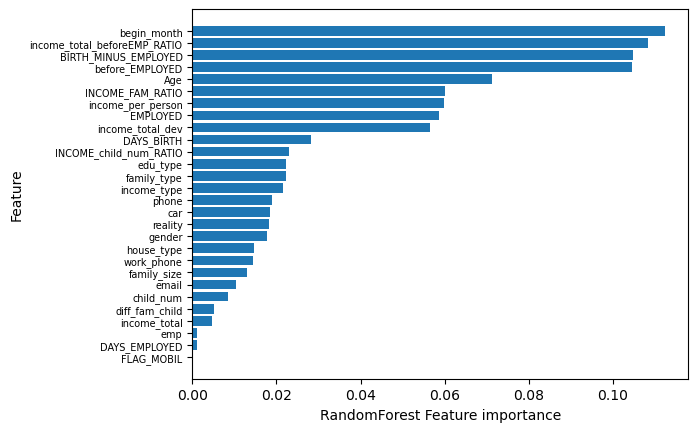

In [31]:
# Tree 기반 모델에서 feature importance 시각화 코드
def feature_importances(model, train):
    n_features = train.shape[1]
    tp_df = pd.DataFrame(model.feature_importances_).rename(columns = ({0:'feature_import'}))
    tp_df['feat'] = train.columns
    tp_df.sort_values(by = 'feature_import', inplace = True)
    tp_df.reset_index(inplace = True)
    
    plt.barh(tp_df.index, tp_df['feature_import'], align = 'center')
    plt.yticks(tp_df.index, tp_df['feat'], fontsize = 7)
    plt.xlabel('RandomForest Feature importance')
    plt.ylabel('Feature')


feature_importances(rf, X_train)

결과를 보면 저희가 만들어 놓은 데이터 및 원본 데이터에 대해 RandomForest 모델이 위와 같이 중요도를 파악한 것을 알 수 있습니다.

`begin_month`, `income_total_beforeEMP_RATIO`, `before_EMPLOYED` 변수들이 Target을 예측하는데 중요하게 사용되었군요.

반면에 `FLAG_MOBIL`, `emp`, `DAYS_EMPLOYED` 같은 변수들은 거의 중요하지 않다고 나옵니다.

### Feature Importance의 활용

이러한 척도를 통해 무엇을 할 수 있을까요? 🧐

앞서 말했듯이 **모델의 설명력을 키울 수 있게** 됩니다.  

물론 해당 모델에서는 Feature가 Target을 예측하는데 중요도가 크지만 실생활에서는 정말로 중요하게 적용되지 않는 경우도 많습니다.
Tree 모델의 Importance는 불순도를 통해서 계산되기 때문이죠.(현재는 Default값인 Gini 계수를 통해 측정이 되었는데, 더 궁금하시다면 검색해보시길 바랍니다😓) 

어쨌던 부족한 점이 존재하여 해당 모델에만 완전히 의존하여 결론을 낼 수는 없습니다. 따라서 이러한 <font color = coral>**척도를 참고하여 통계적으로, 혹은 도메인 지식을 활용한 사후분석**</font>을 해볼 수도 있겠습니다.

이 뿐 아니라 **쓸모없는 Feature를 판별하여 제거**할 수도 있습니다. `FLAG_MOBIL` 같은 경우에는 중요도가 거의 0으로 나오기 때문에 모델에 fitting할 필요도 없겠죠! 분석 시에 Feature가 너무 많다면  <font color = coral>**컴퓨팅 코스트를 아끼기 위해 척도를 기반으로 이같은 Feature를 제거**</font>하는 경우도 있습니다.

---

####  <font color = red>**주의점**</font> 



1. **설명할 모델은 예측에 사용한 모델이어야 합니다.**
     
     이것이 무슨말인가 하니! 만약 앙상블 모델을 통해서 Prediction 값을 예측했는데, 갑자기 다른 모델을 사용하여 Feature를 설명하면 안된다는 말입니다. 따라서 앙상블을 사용할 경우에는 이같은 모델 설명을 할 수 없게됩니다.  
     
        
2. **위에서 예시를 든 Feature Importance 그래프는 Tree기반 모델에서만 사용 가능합니다.**
     
    코드를 보면 알 수 있듯 Tree기반 모델의 경우에는 대부분 Feature Importance를 자체적으로 제공합니다. Tree기반이 아닌 다른 모델에서는 이같은 코드를 사용할 수 없습니다.  
     
         Tree 기반 모델 예시: RandomForest, ExtraTree, GBM, XGB, LGBM 등...
         
3. **이 외에도 중요도를 계산해주는 패키지들이 있습니다.** 
    
    eli5 / shap 등... Jupyter Light 환경에서는 실행이 불가하지만 이것들을 활용해 중요도를 파악하는 것도 굉장히 도움이 됩니다.

### Inst.

- LGBM 모델을 사용하여 Feature Importance를 구해보세요
- 모델에서 중요하게 생각하는 Feature는 무엇인지 또, 그렇지 않은 Feature는 무엇인지 살펴보세요

### Hint.

- lgbm모델은 LGBMClassifier 로 할당할 수 있습니다.
- 미리 구해놓은 하이퍼 파라미터를 사용하는 것도 좋습니다.

### Solution.

In [32]:
# data split
X_train, X_val, y_train, y_val = train_test_split(train, target ,test_size=0.3)


#  앞서 구해놓은 clfs_tuned에서 사용할 모델의 파라미터 가져오기
for i in range(len(clfs_tuned)):
    if clfs_tuned[i][0] == 'LGBMClassifier':
        params = clfs_tuned[i][1].best_params_
        
# 변수에 모델 할당 
lgbm =  LGBMClassifier (**params)             # best params들을 unpacking하여 모델에 할당

lgbm.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=300, num_leaves=256,
               subsample=0.3)

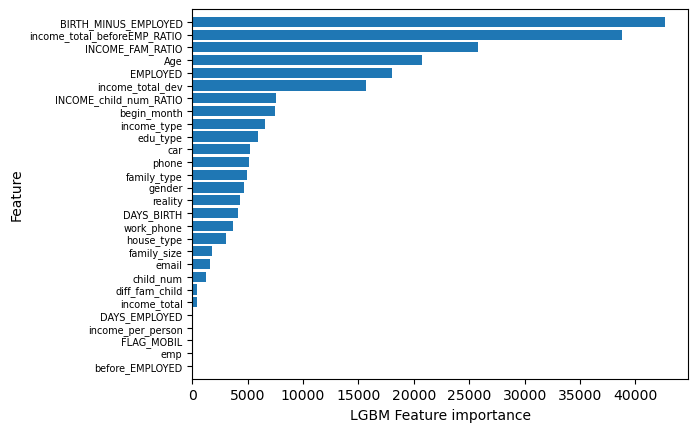

In [33]:
def feature_importances(model, train):
    n_features = train.shape[1]
    tp_df = pd.DataFrame(model.feature_importances_).rename(columns = ({0:'feature_import'}))
    tp_df['feat'] = train.columns
    tp_df.sort_values(by = 'feature_import', inplace = True)
    tp_df.reset_index(inplace = True)
    
    plt.barh(tp_df.index, tp_df['feature_import'], align = 'center')
    plt.yticks(tp_df.index, tp_df['feat'], fontsize = 7)
    plt.xlabel('LGBM Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)


feature_importances(lgbm, X_train)

- 중요 Feature  
        BIRTH_MINUS_EMPLOYED
        income_totla_beforeEMP_RAIO
        INCOME_FAM_RATIO
    
- 중요하지 않은 Feature  
        before_EMPLOYED
        emp
        FLAG_MOBIL
        income_per_person
        DAYS_EMPLOYED

### <font color = red>Last Inst.</font>

현재까지 배운 기술들을 활용하여 DACON 대회에서 점수를 향상시켜 보세요!


좋은 Score가 나오길 응원합니다 👍🏻

# Outro 

자! 여기까지 데이터 분석에 대해 기초부터 심화까지 살펴보았습니다.  
 
짧은 시간동안 따라오시느라 고생 많으셨습니다. 👏🏻👏🏻👏🏻

물론 저희가 소개시켜드린 방법 말고도 더 다양한 기법들이 존재하고, 쉬운 이해를 고려하여 생략한 설명도 존재합니다. 

데이터 분석의 세계는 넓고도 깊습니다. 저희의 자료를 기반으로 혼자 꾸준히 학습을 진행해보시고 코드를 업그레이드 시켜 보세요.

즐거운 학습이 되셨길 바라겠습니다! 안녕~ 👋